## Import Libraries

In [36]:
import os
import json
import random
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

## Data Preprocessing

In [20]:
file_path = r'C:\Users\Krishna Sahoo\Documents\Python Venv\HerokuDemo\Images'
filenames = os.listdir(file_path)

In [21]:
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [22]:
df.category = df.category.map(
    {
        0: '0',
        1: '1'
    }
)

df.head()

filename category
0    cat.0.jpg        0
1    cat.1.jpg        0
2   cat.10.jpg        0
3  cat.100.jpg        0
4   cat.11.jpg        0

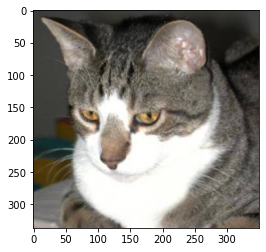

In [23]:
sample = random.choice(filenames)
image = load_img(os.path.join(file_path, sample))
plt.imshow(image)

In [24]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    file_path, 
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 161 validated image filenames belonging to 2 classes.


In [26]:
train_df

filename category
0    dog.97.jpg        1
1    cat.42.jpg        0
2     cat.3.jpg        0
3    dog.27.jpg        1
4    dog.95.jpg        1
..          ...      ...
156  dog.12.jpg        1
157  cat.20.jpg        0
158  cat.91.jpg        0
159  dog.79.jpg        1
160   dog.1.jpg        1

[161 rows x 2 columns]

In [27]:
validate_df

filename category
0    cat.94.jpg        0
1    cat.21.jpg        0
2    cat.35.jpg        0
3    dog.60.jpg        1
4    dog.85.jpg        1
5    dog.20.jpg        1
6    cat.70.jpg        0
7    dog.72.jpg        1
8    dog.62.jpg        1
9    cat.49.jpg        0
10   cat.68.jpg        0
11   dog.52.jpg        1
12   dog.67.jpg        1
13   cat.79.jpg        0
14   dog.93.jpg        1
15   dog.98.jpg        1
16   cat.59.jpg        0
17   dog.55.jpg        1
18   cat.82.jpg        0
19    cat.7.jpg        0
20    dog.3.jpg        1
21   cat.22.jpg        0
22   dog.83.jpg        1
23   cat.92.jpg        0
24   cat.67.jpg        0
25   cat.62.jpg        0
26   cat.84.jpg        0
27   cat.69.jpg        0
28   dog.30.jpg        1
29   dog.43.jpg        1
30   cat.16.jpg        0
31   cat.24.jpg        0
32   cat.58.jpg        0
33   cat.76.jpg        0
34   dog.65.jpg        1
35  dog.100.jpg        1
36    dog.4.jpg        1
37   dog.41.jpg        1
38   dog.66.jpg        1
39   cat.77.jpg        0
40    cat.8.jpg        0

In [28]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    file_path, 
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 41 validated image filenames belonging to 2 classes.


In [29]:
# Helper Function

def check(t):
  if t[0] == 1:
    return "Cat"
  
  return "Dog"

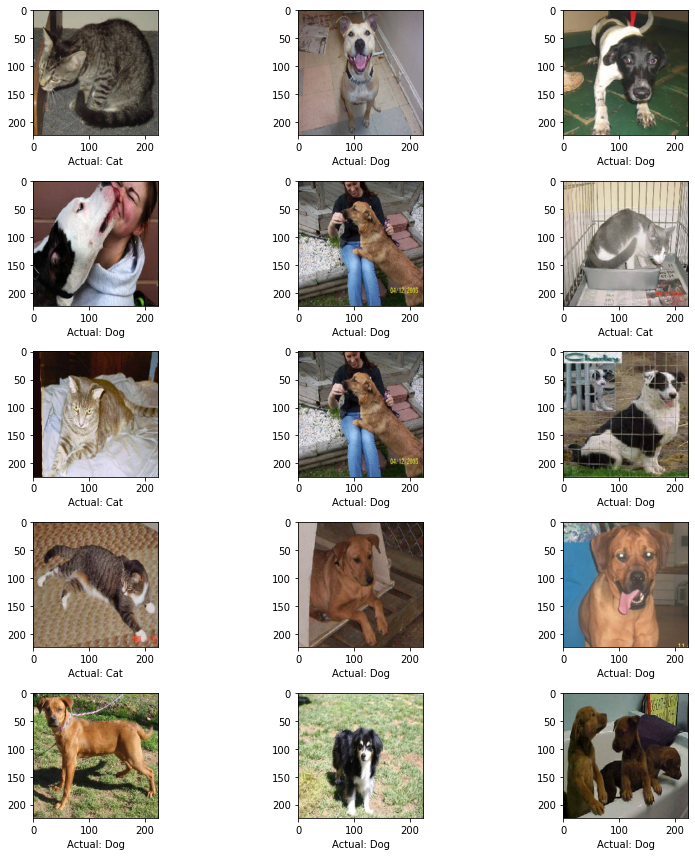

In [30]:
plt.figure(figsize=(12, 12))

for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.xlabel("Actual: " + check(Y_batch[0]))
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

## Model Architecture

In [31]:
model = Sequential()

model.add(Conv2D(64, kernel_size=5, kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, strides=2, kernel_initializer='he_uniform'))
model.add(Activation('elu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=3, kernel_initializer='he_uniform', padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=5, strides=2, kernel_initializer='he_uniform', padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(756, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, kernel_initializer='he_uniform'))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      4864      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 128)     73856     
_________________________________________________________________
activation_1 (Activation)    (None, 111, 111, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 128)       0

In [32]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

## Model Training

In [33]:
history = model.fit(
    train_generator, 
    epochs=10,
    validation_data=validation_generator,
)

Epoch 1/10
6/6 [==============================] - 39s 5s/step - loss: 1.0062 - accuracy: 0.5342 - val_loss: 2.2060 - val_accuracy: 0.4634
Epoch 2/10
6/6 [==============================] - 31s 5s/step - loss: 0.8617 - accuracy: 0.6273 - val_loss: 4.1429 - val_accuracy: 0.6829
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 0.8676 - accuracy: 0.6460 - val_loss: 5.9640 - val_accuracy: 0.5366
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 0.7182 - accuracy: 0.6832 - val_loss: 5.9763 - val_accuracy: 0.5366
Epoch 5/10
6/6 [==============================] - 31s 5s/step - loss: 0.6893 - accuracy: 0.6957 - val_loss: 5.7857 - val_accuracy: 0.5122
Epoch 6/10
6/6 [==============================] - 28s 4s/step - loss: 0.6233 - accuracy: 0.7640 - val_loss: 7.6267 - val_accuracy: 0.5366
Epoch 7/10
6/6 [==============================] - 31s 5s/step - loss: 0.6115 - accuracy: 0.7702 - val_loss: 8.9488 - val_accuracy: 0.5366
Epoch 8/10
6/6 [==================

accuracy: 53.66%


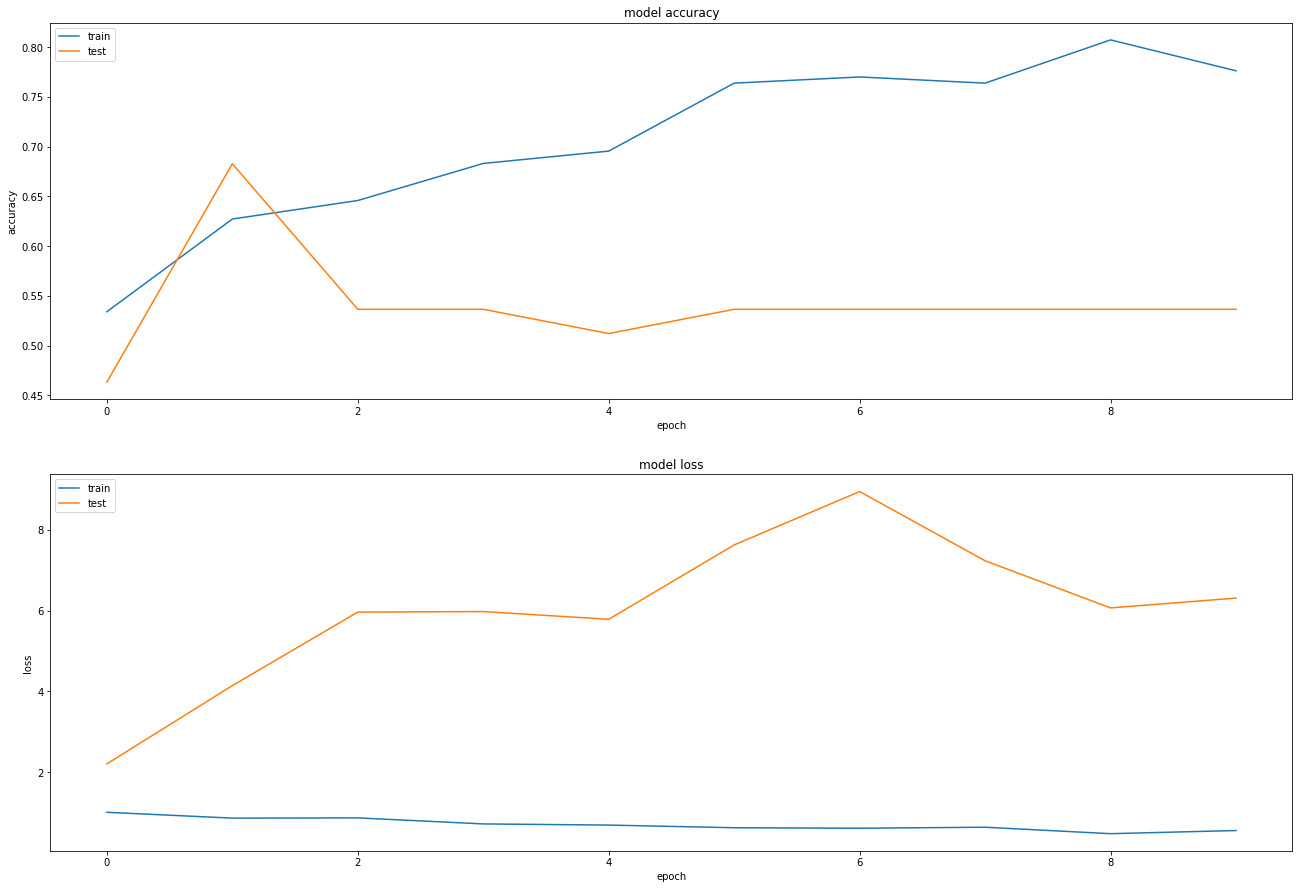

In [34]:
score = model.evaluate(validation_generator, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

plt.subplots_adjust(right=3, top=3)
plt.show()

In [37]:
tf.keras.models.save_model(model,'my_model.hdf5')

## Performance on Test Data

In [ ]:
model.save('final.h5')

In [ ]:
!ls

drive	  gdrive       sampleSubmission.csv  test1.zip	train.zip
final.h5  sample_data  test1		     train


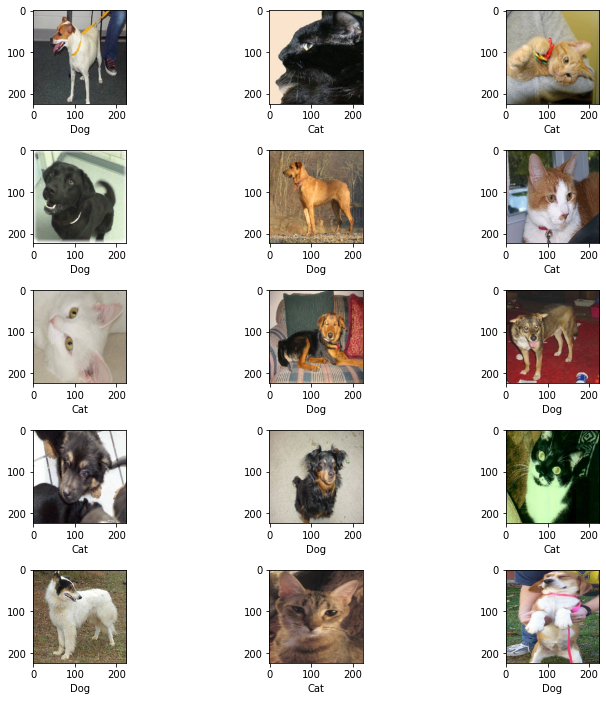

In [ ]:
import pandas as pd
import numpy as np

val_image_batch, val_label_batch = next(iter(validation_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

pred = model.predict(val_image_batch)
pred_df = pd.DataFrame(pred)
pred_df.columns = [1, 0]
pred_ids = np.argmax(pred, axis=-1)


plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for n in range(15):
  plt.subplot(5, 3, n+1)
  plt.imshow(val_image_batch[n])

  plt.xlabel("Cat" if pred_ids[n] == 0 else "Dog")